# Image Recognition Program
- This program will be used as the final classification for our system. 
- Input: 
    1. image file
- Output:
    1. Label of the object in the image
    2. Specific description of the object such as color

Final outputs will be stored in the database, and it will be used to compare with the description that lost users provides to us. If the description obtained from the image of found user and the description provided from lost user is similar enough, our server will connect the users. 

- You can try yourself by following 5 steps:

1. Install following libs:
    - pip install opencv-python
    - pip install matplotlib
    - pip install colorthief
    - pip install webcolors

In [1]:
import cv2

In [2]:
import matplotlib.pyplot as plt

In [3]:
from colorthief import ColorThief

In [4]:
import webcolors

In [5]:
from scipy.spatial import KDTree

2. Put your absolute path of currenct directory

In [6]:
absolute_path = ''

3. Download, Unzip, and relocate the files
    - Download the "MobileNet-SSD v3" zip files from following link: https://github.com/opencv/opencv/wiki/TensorFlow-Object-Detection-API
    - Unzip both "weights" and "config" files, and paste the following files to the same location of this file

In [7]:
config_file = absolute_path + 'ssd_mobilenet_v3_large_coco_2020_01_14.pbtxt'
frozen_model = absolute_path + 'frozen_inference_graph.pb'

In [8]:
model = cv2.dnn_DetectionModel(frozen_model,config_file)

4. Import and copy the labels as follows:
    - Copy the labels from the following link: https://github.com/pjreddie/darknet/blob/master/data/coco.names
    - Paste them in a new file name "Labels"

In [9]:
classLabels = []
file_name = absolute_path + 'Labels'
with open(file_name, 'rt') as fpt:
    classLabels = fpt.read().rstrip('\n').split('\n')

In [10]:
# There are total of 80 labels supported from this 
print(classLabels)

['person', 'bicycle', 'car', 'motorbike', 'aeroplane', 'bus', 'train', 'truck', 'boat', 'traffic light', 'fire hydrant', 'stop sign', 'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow', 'elephant', 'bear', 'zebra', 'giraffe', 'backpack', 'umbrella', 'handbag', 'tie', 'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball', 'kite', 'baseball bat', 'baseball glove', 'skateboard', 'surfboard', 'tennis racket', 'bottle', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple', 'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza', 'donut', 'cake', 'chair', 'sofa', 'pottedplant', 'bed', 'diningtable', 'toilet', 'tvmonitor', 'laptop', 'mouse', 'remote', 'keyboard', 'cell phone', 'microwave', 'oven', 'toaster', 'sink', 'refrigerator', 'book', 'clock', 'vase', 'scissors', 'teddy bear', 'hair drier', 'toothbrush']


In [11]:
model.setInputSize(320, 320)
model.setInputScale(1.0/127.5)
model.setInputMean((127.5, 127.5, 127.5))
model.setInputSwapRB(True)

< cv2.dnn.Model 0x7ff04077ebf0>

5. Try with your owm image that contains object with one of the labels above

In [12]:
img_file = 'image2.jpeg'

img = cv2.imread(absolute_path + img_file)

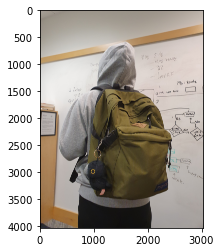

In [13]:
plt.imshow(img)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

In [14]:
ClassIndex, confidence, bbox = model.detect(img, confThreshold=0.5)

In [15]:
print(ClassIndex)
if (len(ClassIndex)>0):
    for idx in ClassIndex:
        if idx > 80:
            continue
        else:
            print(classLabels[idx-1])

[ 1 27]
person
handbag


In [16]:
# This function converts rgb 3-tuples to name of closest color
def convert_rgb_to_names(rgb_tuple):
    css3_db = webcolors.CSS3_HEX_TO_NAMES
    names = []
    rgb_values = []
    for color_hex, color_name in css3_db.items():
        names.append(color_name)
        rgb_values.append(webcolors.hex_to_rgb(color_hex))
    
    kdt_db = KDTree(rgb_values)
    distance, index = kdt_db.query(rgb_tuple)
    return names[index]

In [17]:
font_scale = 3
font = cv2.FONT_HERSHEY_PLAIN
for ClassInd, conf, boxes in zip(ClassIndex.flatten(), confidence.flatten(), bbox):
    prefix, ext = img_file.split('.')
    filename = absolute_path + prefix + classLabels[ClassInd-1] + '.' + ext
    cv2.imwrite(filename, img[boxes[1]: boxes[1]+boxes[3], boxes[0]:boxes[0]+boxes[2]])
    color_thief = ColorThief(filename)
    dominant_color = color_thief.get_color(quality=1)
    print(convert_rgb_to_names(dominant_color), classLabels[ClassInd-1])

darkslategray person
darkslategray handbag
